## Network Intrusion Detection  -  Multinomial classification and prediction of attacks according to attack categories

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn as sk
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
datacol=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [4]:
df_train = pd.read_csv('Train.txt',sep=',',names=datacol)
df_train = df_train.iloc[:,:-1]
df_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df_test = pd.read_csv('Test.txt',sep=',',names=datacol)
df_test = df_test.iloc[:,:-1]
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [8]:
df_train.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

### Mapping different attacks to their attack class

In [9]:
mapping={'back':'Dos', 'land':'Dos', 'neptune':'Dos', 'pod':'Dos','smurf':'Dos','teardrop':'Dos','satan':'Probe', 'ipsweep':'Probe', 'nmap':'Probe', 'portsweep':'Probe', 'mscan':'Probe','saint':'Probe','apache2':'Probe', 'udpstorm':'Probe','processtable':'Probe', 'worm':'Probe','buffer_overflow':'U2R', 'loadmodule':'U2R', 'rootkit':'U2R','perl':'U2R','sqlattack':'U2R', 'xterm':'U2R', 'ps':'U2R','guess_passwd' :'R2L', 'ftp_write':'R2L', 'imap':'R2L', 'phf':'R2L','multihop':'R2L', 'warezmaster':'R2L','warezclient':'R2L', 'spy':'R2L','xlock':'R2L', 'xsnoop':'R2L', 'snmpguess':'R2L', 'snmpgetattack':'R2L' ,'httptunnel':'R2L',  'sendmail':'R2L', 'named':'R2L','normal':'Normal','mailbomb': 'Dos'}
         


In [10]:
df_train['attack_cat']=df_train.attack.apply(lambda x:mapping[x])

In [11]:
df_train.attack_cat.value_counts()

Normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack_cat, dtype: int64

In [12]:
df_train.drop(columns=['attack'],inplace=True)

In [13]:
df_test['attack_cat']=df_test.attack.apply(lambda x:mapping[x])
df_test.drop(['attack'],axis=1,inplace=True)

In [14]:
df_test.attack_cat.value_counts()

Normal    9711
Dos       6034
Probe     3847
R2L       2885
U2R         67
Name: attack_cat, dtype: int64

In [339]:
pandas_profiling.ProfileReport(df_test)

Number of variables,42
Number of observations,22544
Total Missing (%),0.0%
Total size in memory,7.2 MiB
Average record size in memory,336.0 B
Numeric,25
Categorical,4
Boolean,5
Date,0
Text (Unique),0
Rejected,8


### 8 variable  dropped based on pandas profile rejection+ service variable  because ofhigh cardiniality

In [15]:
p_test=df_test.drop(columns=['dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds' ,'num_root','srv_rerror_rate','srv_serror_rate','service'])

In [16]:
p_train=df_train.drop(columns=['dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate','num_outbound_cmds' ,'num_root','srv_rerror_rate','srv_serror_rate','service'])

In [17]:
p_train.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'attack_cat'],
      dtype='object')

## Outlier handling, normalizing numerical data using StandardScalor

In [18]:
p_test_num=p_test._get_numeric_data()
p_train_num=p_train._get_numeric_data()

In [19]:
p_test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 30 columns):
duration                       22544 non-null int64
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_access_files               22544 non-null int64
is_host_login                  22544 non-null int64
is_guest_login                 22544 non-null int64
count  

In [20]:
p_test_num.columns


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate'],
      dtype='object')

In [21]:
column=p_train_num.columns


In [22]:
column

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate'],
      dtype='object')

In [23]:
#Outlier handling
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

p_train_num=p_train_num.apply(lambda x: outlier_capping(x))
p_test_num=p_test_num.apply(lambda x: outlier_capping(x))



C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:

sc_test=scaler.fit_transform(p_test_num[column])
sc_train=scaler.fit_transform(p_train_num[column])


C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
sc_train=pd.DataFrame(sc_train,columns=column)
sc_test=pd.DataFrame(sc_test,columns=column)

In [27]:
sc_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
0,-0.138442,-0.087734,-0.352792,0.0,0.0,0.0,-0.140747,0.0,-0.809262,-0.101557,...,-0.374362,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.280282,0.069972,-0.320917,-0.224532
1,-0.138442,-0.143942,-0.352792,0.0,0.0,0.0,-0.140747,0.0,-0.809262,-0.101557,...,-0.374362,-1.321428,0.482201,-0.374560,0.734343,-1.035688,2.736852,2.367737,-0.320917,-0.387635
2,-0.138442,-0.167729,-0.352792,0.0,0.0,0.0,-0.140747,0.0,-0.809262,-0.101557,...,-0.374362,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.174417,-0.480197,-0.320917,-0.387635
3,-0.138442,-0.129931,1.790321,0.0,0.0,0.0,-0.140747,0.0,1.235694,-0.101557,...,-0.374362,0.771283,-0.349683,-0.374560,-1.533670,1.258754,-0.439078,-0.383108,0.112042,-0.387635
4,-0.138442,-0.135307,-0.242390,0.0,0.0,0.0,-0.140747,0.0,1.235694,-0.101557,...,-0.374362,0.771283,-0.349683,-0.028179,0.734343,1.258754,-0.439078,-0.480197,-0.320917,-0.387635


In [28]:
sc_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_rerror_rate
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.0,125973.0,125973.0,1.259730e+05,125973.0,1.259730e+05,1.259730e+05,...,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05
mean,3.842203e-15,1.342781e-16,-1.727423e-15,0.0,0.0,0.0,3.457075e-15,0.0,-1.336484e-15,2.417991e-15,...,1.298313e-15,-4.595268e-15,2.934935e-16,-1.635145e-16,1.304769e-15,-6.086957e-16,-4.873196e-16,-2.412371e-16,1.030853e-15,1.151483e-15
std,1.000004e+00,1.000004e+00,1.000004e+00,0.0,0.0,0.0,1.000004e+00,0.0,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.384417e-01,-1.677287e-01,-3.527918e-01,0.0,0.0,0.0,-1.407474e-01,0.0,-8.092618e-01,-1.015570e-01,...,-3.743622e-01,-1.503403e+00,-3.496830e-01,-3.745597e-01,-1.825992e+00,-1.035688e+00,-4.390782e-01,-4.801968e-01,-3.209172e-01,-3.876346e-01
25%,-1.384417e-01,-1.677287e-01,-3.527918e-01,0.0,0.0,0.0,-1.407474e-01,0.0,-8.092618e-01,-1.015570e-01,...,-3.743622e-01,-1.298681e+00,-3.496830e-01,-3.745597e-01,-1.009507e+00,-9.543889e-01,-4.390782e-01,-4.801968e-01,-3.209172e-01,-3.876346e-01
50%,-1.384417e-01,-1.605601e-01,-3.527918e-01,0.0,0.0,0.0,-1.407474e-01,0.0,-8.092618e-01,-1.015570e-01,...,-3.743622e-01,7.712831e-01,-3.496830e-01,-3.745597e-01,7.343426e-01,-4.756273e-01,-3.332138e-01,-4.801968e-01,-3.209172e-01,-3.876346e-01
75%,-1.384417e-01,-1.227620e-01,-2.171551e-01,0.0,0.0,0.0,-1.407474e-01,0.0,1.235694e+00,-1.015570e-01,...,-3.743622e-01,7.712831e-01,-1.692960e-02,-3.745597e-01,7.343426e-01,1.258754e+00,-6.855302e-02,-2.860195e-01,-1.044377e-01,-3.876346e-01
max,8.613207e+00,8.718080e+00,6.355181e+00,0.0,0.0,0.0,8.386203e+00,0.0,1.235694e+00,9.846686e+00,...,2.746403e+00,7.712831e-01,5.196208e+00,3.474118e+00,7.343426e-01,1.258754e+00,4.854138e+00,2.756092e+00,5.307550e+00,2.874410e+00


### Feature encoding for categorical data
### creating dummies for  'protocol_type' and 'flag'. For y variable 'attack_cat' label encoding is performed as we are performing mutlinomial classification

In [29]:
df_train_cat=p_train.select_dtypes(include=['object'])
df_test_cat=p_test.select_dtypes(include=['object'])

In [30]:
df_train_cat.head()

,protocol_type,flag,attack_cat
0,tcp,SF,Normal
1,udp,SF,Normal
2,tcp,S0,Dos
3,tcp,SF,Normal
4,tcp,SF,Normal


In [31]:
df_test_cat.head()

,protocol_type,flag,attack_cat
0,tcp,REJ,Dos
1,tcp,REJ,Dos
2,tcp,SF,Normal
3,icmp,SF,Probe
4,tcp,RSTO,Probe


In [32]:
df_train_cat.attack_cat.value_counts()

Normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack_cat, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [34]:
train_cat1=pd.DataFrame()
test_cat1=pd.DataFrame()
train_cat1['attack_cat']=encoder.fit_transform(df_train_cat.attack_cat)
test_cat1['attack_cat']=encoder.fit_transform(df_test_cat.attack_cat)

In [35]:
train_cat1['attack_cat'].value_counts()

1    67343
0    45927
2    11656
3      995
4       52
Name: attack_cat, dtype: int64

In [36]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [37]:
feature_list =['protocol_type','flag']

for c_feature in feature_list:
    df_train_cat[c_feature] =df_train_cat[c_feature].astype('category')
    df_train_cat = create_dummies(df_train_cat , c_feature )
    df_test_cat[c_feature] = df_test_cat[c_feature].astype('category')
    df_test_cat = create_dummies(df_test_cat , c_feature )

C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 13 columns):
attack_cat           125973 non-null object
protocol_type_tcp    125973 non-null uint8
protocol_type_udp    125973 non-null uint8
flag_REJ             125973 non-null uint8
flag_RSTO            125973 non-null uint8
flag_RSTOS0          125973 non-null uint8
flag_RSTR            125973 non-null uint8
flag_S0              125973 non-null uint8
flag_S1              125973 non-null uint8
flag_S2              125973 non-null uint8
flag_S3              125973 non-null uint8
flag_SF              125973 non-null uint8
flag_SH              125973 non-null uint8
dtypes: object(1), uint8(12)
memory usage: 2.4+ MB


In [39]:
train_cat=pd.concat([train_cat1,df_train_cat[df_train_cat.columns.difference(['attack_cat'])]],axis=1)
test_cat=pd.concat([test_cat1,df_test_cat[df_test_cat.columns.difference(['attack_cat'])]],axis=1)

In [40]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 13 columns):
attack_cat           125973 non-null int32
flag_REJ             125973 non-null uint8
flag_RSTO            125973 non-null uint8
flag_RSTOS0          125973 non-null uint8
flag_RSTR            125973 non-null uint8
flag_S0              125973 non-null uint8
flag_S1              125973 non-null uint8
flag_S2              125973 non-null uint8
flag_S3              125973 non-null uint8
flag_SF              125973 non-null uint8
flag_SH              125973 non-null uint8
protocol_type_tcp    125973 non-null uint8
protocol_type_udp    125973 non-null uint8
dtypes: int32(1), uint8(12)
memory usage: 1.9 MB


In [41]:
train_cat.head()

,attack_cat,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0


## combining numerical and encoded categorical data

In [42]:
train=pd.concat([sc_train,train_cat],axis=1)
test=pd.concat([sc_test,test_cat],axis=1)

In [43]:
feat_col=train.columns.difference(['attack_cat'])

In [44]:

train_x=train[feat_col]
train_y=train['attack_cat']

test_x=test[feat_col]
test_y=test['attack_cat']


In [45]:
train_y.head()

0    1
1    1
2    0
3    1
4    1
Name: attack_cat, dtype: int32

In [46]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,-0.182023,-0.178996,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,0,0,1,0
1,-0.182023,-0.178996,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,0,0,1,0
2,-0.180214,0.241297,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,1,0,1,0
3,-0.182023,-0.178349,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,1,0,0,0
4,-0.181118,-0.178996,-0.364566,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,0,0,1,0


In [47]:
train.head(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,-0.138442,-0.087734,-0.352792,0.0,0.0,0.0,-0.140747,0.0,-0.809262,-0.101557,...,0,0,0,0,0,0,1,0,1,0
1,-0.138442,-0.143942,-0.352792,0.0,0.0,0.0,-0.140747,0.0,-0.809262,-0.101557,...,0,0,0,0,0,0,1,0,0,1


## variable reduction using RFE

In [48]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [50]:
from sklearn.feature_selection import RFE

rfe = RFE(rfc,n_features_to_select=15)
rfe = rfe.fit(train_x,train_y)

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [51]:
col = train_x.columns[rfe.get_support()] 

In [52]:
col

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'flag_SF', 'hot', 'protocol_type_tcp',
       'serror_rate', 'src_bytes', 'srv_count'],
      dtype='object')

### select kbest

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [54]:
#X = data_new[data_new.columns.difference(['y_yes'])]
X_new = SelectKBest(f_classif, k=15).fit(train_x, train_y )

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [21 22 23 25 27 28 29 33 39 40 41] are constant.
  UserWarning)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [55]:
# summarize the selection of the attributes
import itertools
#feature_map = [(i, v) for i, v in itertools.zip_longest(train_x.columns, X_new.get_support())]

#feature_map

#Alternative of capturing the important variables
KBest_features=train_x.columns[X_new.get_support()]

selected_features_from_KBest = train_x[KBest_features]

In [56]:
KBest_features

Index(['count', 'diff_srv_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'flag_RSTR', 'flag_S0', 'flag_SF',
       'logged_in', 'rerror_rate', 'same_srv_rate', 'serror_rate',
       'srv_diff_host_rate'],
      dtype='object')

### combined features from RFE AND SELECT KBEST

In [57]:
list2=list(col)+list(KBest_features)

In [58]:
list1=list(set(list2))

In [59]:
list1

['dst_host_diff_srv_rate',
 'rerror_rate',
 'diff_srv_rate',
 'same_srv_rate',
 'protocol_type_tcp',
 'dst_bytes',
 'hot',
 'dst_host_count',
 'srv_diff_host_rate',
 'flag_RSTR',
 'logged_in',
 'dst_host_srv_diff_host_rate',
 'flag_S0',
 'dst_host_rerror_rate',
 'srv_count',
 'serror_rate',
 'flag_SF',
 'dst_host_srv_count',
 'count',
 'dst_host_same_src_port_rate',
 'src_bytes']

In [60]:
len(list1)

21

## variable reduction using vif

In [61]:
test.head(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_tcp,protocol_type_udp
0,-0.182023,-0.178996,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,0,0,1,0
1,-0.182023,-0.178996,-0.368438,0.0,0.0,0.0,-0.213753,-0.147181,-0.890373,-0.128998,...,0,0,0,0,0,0,0,0,1,0


In [62]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [63]:
data_vif=pd.concat([train_x[list1],train['attack_cat']],axis=1)

In [64]:
features = "+".join(list1)
features

'dst_host_diff_srv_rate+rerror_rate+diff_srv_rate+same_srv_rate+protocol_type_tcp+dst_bytes+hot+dst_host_count+srv_diff_host_rate+flag_RSTR+logged_in+dst_host_srv_diff_host_rate+flag_S0+dst_host_rerror_rate+srv_count+serror_rate+flag_SF+dst_host_srv_count+count+dst_host_same_src_port_rate+src_bytes'

In [65]:
a,b = dmatrices(formula_like='attack_cat ~ '+ features, data =train , return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0   160.601826                    Intercept
1     2.385194       dst_host_diff_srv_rate
2    34.668093                  rerror_rate
3     2.028173                diff_srv_rate
4    10.922761                same_srv_rate
5     8.220453            protocol_type_tcp
6     1.264580                    dst_bytes
7     1.255038                          hot
8     2.129588               dst_host_count
9     1.400978           srv_diff_host_rate
10    1.711987                    flag_RSTR
11   11.795303                    logged_in
12    1.959730  dst_host_srv_diff_host_rate
13   31.696333                      flag_S0
14    8.853652         dst_host_rerror_rate
15    3.947107                    srv_count
16   56.459440                  serror_rate
17   59.610778                      flag_SF
18    3.415882           dst_host_srv_count
19    4.740607                        count
20    2.077571  dst_host_same_src_port_rate
21    1.212710                  

In [66]:
temp1=train_x[list1].drop(columns=['rerror_rate','count','flag_SF','flag_S0','same_srv_rate','serror_rate','logged_in', 'protocol_type_tcp'])

In [67]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 13 columns):
dst_host_diff_srv_rate         125973 non-null float64
diff_srv_rate                  125973 non-null float64
dst_bytes                      125973 non-null float64
hot                            125973 non-null float64
dst_host_count                 125973 non-null float64
srv_diff_host_rate             125973 non-null float64
flag_RSTR                      125973 non-null uint8
dst_host_srv_diff_host_rate    125973 non-null float64
dst_host_rerror_rate           125973 non-null float64
srv_count                      125973 non-null float64
dst_host_srv_count             125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
src_bytes                      125973 non-null float64
dtypes: float64(12), uint8(1)
memory usage: 11.7 MB


In [68]:
features2 = "+".join(list(temp1.columns))
features2

'dst_host_diff_srv_rate+diff_srv_rate+dst_bytes+hot+dst_host_count+srv_diff_host_rate+flag_RSTR+dst_host_srv_diff_host_rate+dst_host_rerror_rate+srv_count+dst_host_srv_count+dst_host_same_src_port_rate+src_bytes'

In [69]:
a,b = dmatrices(formula_like='attack_cat ~ '+ features2, data =train , return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0     1.025286                    Intercept
1     1.886087       dst_host_diff_srv_rate
2     1.448582                diff_srv_rate
3     1.207967                    dst_bytes
4     1.190526                          hot
5     1.762476               dst_host_count
6     1.359774           srv_diff_host_rate
7     1.290445                    flag_RSTR
8     1.842733  dst_host_srv_diff_host_rate
9     1.285666         dst_host_rerror_rate
10    1.260251                    srv_count
11    1.574587           dst_host_srv_count
12    1.702654  dst_host_same_src_port_rate
13    1.189126                    src_bytes


### Final data set with selected 12 features

In [70]:
train_fx_new=train_x[list(temp1.columns)]

In [71]:
test_fx_new=test_x[list(temp1.columns)]

In [72]:
test_fx_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 13 columns):
dst_host_diff_srv_rate         22544 non-null float64
diff_srv_rate                  22544 non-null float64
dst_bytes                      22544 non-null float64
hot                            22544 non-null float64
dst_host_count                 22544 non-null float64
srv_diff_host_rate             22544 non-null float64
flag_RSTR                      22544 non-null uint8
dst_host_srv_diff_host_rate    22544 non-null float64
dst_host_rerror_rate           22544 non-null float64
srv_count                      22544 non-null float64
dst_host_srv_count             22544 non-null float64
dst_host_same_src_port_rate    22544 non-null float64
src_bytes                      22544 non-null float64
dtypes: float64(12), uint8(1)
memory usage: 2.1 MB


## Building model -multinomial classification

In [73]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

### RF MODEL

In [74]:
y = label_binarize(train['attack_cat'], classes=[0, 1, 2,3,4])
n_classes = y.shape[1]

In [75]:
y_test = label_binarize(test['attack_cat'], classes=[0, 1, 2,3,4])


In [99]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=80))
model = classifier.fit(train_fx_new, y)
y_score=model.predict(train_fx_new)

In [100]:
model

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=None)

#### model performance on train and test data with cross validation

In [101]:
print(np.mean(cross_val_score(model,train_fx_new, y,cv=2)))

0.9966421387979909


In [102]:
print("Test data \n",np.mean(cross_val_score( model, test_fx_new, y_test, cv=2 )))

Test data 
 0.9749378992193045


#### Train Data Results


In [103]:
from sklearn.metrics import auc,roc_curve

In [105]:
fpr = dict()
tpr = dict()

roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [106]:
print("TRAIN DATA : ROC_AUC score for all classes\n")
roc_auc


TRAIN DATA : ROC_AUC score for all classes



{0: 0.9999361074319362,
 1: 0.9999042835962167,
 2: 0.99995272983494,
 3: 1.0,
 4: 0.9999960292564385,
 'micro': 0.9999474093654988}

In [107]:

for i in range(n_classes):
    conf_mat = metrics.confusion_matrix( y[:,i],y_score[:, i])
    print(conf_mat)
    classification = metrics.classification_report(y[:,i],y_score[:, i])
    print(classification)

[[80041     5]
 [    3 45924]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80046
           1       1.00      1.00      1.00     45927

   micro avg       1.00      1.00      1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973

[[58624     6]
 [    6 67337]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58630
           1       1.00      1.00      1.00     67343

   micro avg       1.00      1.00      1.00    125973
   macro avg       1.00      1.00      1.00    125973
weighted avg       1.00      1.00      1.00    125973

[[114316      1]
 [     1  11655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114317
           1       1.00      1.00      1.00     11656

   micro avg       1.00      1.00      1.00    125973
   macro avg       1.00      1.

#### TEST DATA RESULTS

In [108]:
y_testscore = model.predict(test_fx_new)

In [110]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_testscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_testscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [111]:
print("TEST DATA : ROC_AUC score for all classes")
roc_auc

TEST DATA : ROC_AUC score for all classes


{0: 0.8727715868909212,
 1: 0.7530533653795499,
 2: 0.6560670676091416,
 3: 0.5003466204506066,
 4: 0.5,
 'micro': 0.7931822214336408}

In [112]:
for i in range(n_classes):
    conf_mat = metrics.confusion_matrix( y_test[:,i],y_testscore[:, i])
    print(conf_mat)
    classification = metrics.classification_report(y_test[:,i],y_testscore[:, i])
    print(classification)

[[16000   510]
 [ 1349  4685]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     16510
           1       0.90      0.78      0.83      6034

   micro avg       0.92      0.92      0.92     22544
   macro avg       0.91      0.87      0.89     22544
weighted avg       0.92      0.92      0.92     22544

[[7782 5051]
 [ 974 8737]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72     12833
           1       0.63      0.90      0.74      9711

   micro avg       0.73      0.73      0.73     22544
   macro avg       0.76      0.75      0.73     22544
weighted avg       0.78      0.73      0.73     22544

[[18346   351]
 [ 2574  1273]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18697
           1       0.78      0.33      0.47      3847

   micro avg       0.87      0.87      0.87     22544
   macro avg       0.83      0.66      

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 288x288 with 0 Axes>

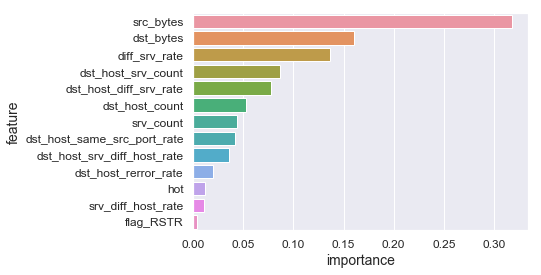

<Figure size 288x288 with 0 Axes>

In [113]:
indices = np.argsort(model.estimators_[1].feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_fx_new.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_fx_new.columns[indices[f]],
                        model.estimators_[1].feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )       
plt.figure(figsize=(4,4))

In [115]:
test_fx_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 13 columns):
dst_host_diff_srv_rate         22544 non-null float64
diff_srv_rate                  22544 non-null float64
dst_bytes                      22544 non-null float64
hot                            22544 non-null float64
dst_host_count                 22544 non-null float64
srv_diff_host_rate             22544 non-null float64
flag_RSTR                      22544 non-null uint8
dst_host_srv_diff_host_rate    22544 non-null float64
dst_host_rerror_rate           22544 non-null float64
srv_count                      22544 non-null float64
dst_host_srv_count             22544 non-null float64
dst_host_same_src_port_rate    22544 non-null float64
src_bytes                      22544 non-null float64
dtypes: float64(12), uint8(1)
memory usage: 2.1 MB


## KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:

KNN_classifier = OneVsRestClassifier(KNeighborsClassifier(n_jobs=-1,n_neighbors=5))


#### Spliiting  the data from train file

In [118]:
train_X,test_X,train_Y,test_Y=train_test_split(train_fx_new, y, test_size=.5,random_state=0)

In [119]:
model_knn = KNN_classifier.fit(train_X, train_Y)


#### model performance with cross validation

In [120]:
print("Train data from train file \n",np.mean(cross_val_score( KNN_classifier, train_X, train_Y, cv = 2 )))

print("Test data from train file\n",np.mean(cross_val_score( KNN_classifier, test_X, test_Y, cv = 2)))
print("Test data from test file\n",np.mean(cross_val_score( KNN_classifier, test_fx_new, y_test, cv = 2)))

Train data from train file 
 0.9851395548217065
Test data from train file
 0.9861399983990572
Test data from test file
 0.9402058197303051


In [121]:
test_pred_tr=KNN_classifier.predict(test_X)
test_pred=KNN_classifier.predict(test_fx_new)


#### Results from train data from Train file

In [122]:
train_pred_tr=KNN_classifier.predict(train_X)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(train_Y[:, i], train_pred_tr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(train_Y.ravel(), train_pred_tr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("TRAIN DATA FROM TRAIN FILE: ROC_AUC score for all classes")
roc_auc

TRAIN DATA FROM TRAIN FILE: ROC_AUC score for all classes


{0: 0.9963457213177288,
 1: 0.9937017383343687,
 2: 0.9926268611635348,
 3: 0.9494948328622305,
 4: 0.5208253920354077,
 'micro': 0.9955823516336963}

In [123]:
for i in range(n_classes):
    conf_mat = metrics.confusion_matrix( train_Y[:,i],train_pred_tr[:, i])
    print(conf_mat)
    classification = metrics.classification_report(train_Y[:,i],train_pred_tr[:, i])
    print(classification)

[[39920   106]
 [  107 22853]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40026
           1       1.00      1.00      1.00     22960

   micro avg       1.00      1.00      1.00     62986
   macro avg       1.00      1.00      1.00     62986
weighted avg       1.00      1.00      1.00     62986

[[29027   195]
 [  200 33564]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29222
           1       0.99      0.99      0.99     33764

   micro avg       0.99      0.99      0.99     62986
   macro avg       0.99      0.99      0.99     62986
weighted avg       0.99      0.99      0.99     62986

[[57167    59]
 [   79  5681]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57226
           1       0.99      0.99      0.99      5760

   micro avg       1.00      1.00      1.00     62986
   macro avg       0.99      0.99  

#### Test data results from Train file

In [124]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], test_pred_tr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), test_pred_tr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("TEST DATA FROM TRAIN FILE: ROC_AUC score for all classes")
roc_auc

TEST DATA FROM TRAIN FILE: ROC_AUC score for all classes


{0: 0.9944028296079678,
 1: 0.9903922498827816,
 2: 0.9875149170310998,
 3: 0.9329887243362307,
 4: 0.5178571428571429,
 'micro': 0.9934331687491069}

In [125]:
for i in range(n_classes):
    conf_mat = metrics.confusion_matrix( test_Y[:,i],test_pred_tr[:, i])
    print(conf_mat)
    classification = metrics.classification_report(test_Y[:,i],test_pred_tr[:, i])
    print(classification)

[[39863   157]
 [  167 22800]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40020
           1       0.99      0.99      0.99     22967

   micro avg       0.99      0.99      0.99     62987
   macro avg       0.99      0.99      0.99     62987
weighted avg       0.99      0.99      0.99     62987

[[29082   326]
 [  273 33306]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29408
           1       0.99      0.99      0.99     33579

   micro avg       0.99      0.99      0.99     62987
   macro avg       0.99      0.99      0.99     62987
weighted avg       0.99      0.99      0.99     62987

[[56992    99]
 [  137  5759]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57091
           1       0.98      0.98      0.98      5896

   micro avg       1.00      1.00      1.00     62987
   macro avg       0.99      0.99  

#### Test data results from test file

In [126]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("TEST DATA FROM TRAIN FILE: ROC_AUC score for all classes")
roc_auc

TEST DATA FROM TRAIN FILE: ROC_AUC score for all classes


{0: 0.8978289089466172,
 1: 0.7399714445198651,
 2: 0.6345580059459711,
 3: 0.5346525945005322,
 4: 0.5,
 'micro': 0.805180979418027}

In [127]:
for i in range(n_classes):
    conf_mat = metrics.confusion_matrix(y_test[:, i], test_pred[:, i])
    print(conf_mat)
    classification = metrics.classification_report(y_test[:, i], test_pred[:, i])
    print(classification)

[[15867   643]
 [  998  5036]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     16510
           1       0.89      0.83      0.86      6034

   micro avg       0.93      0.93      0.93     22544
   macro avg       0.91      0.90      0.91     22544
weighted avg       0.93      0.93      0.93     22544

[[6915 5918]
 [ 572 9139]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68     12833
           1       0.61      0.94      0.74      9711

   micro avg       0.71      0.71      0.71     22544
   macro avg       0.77      0.74      0.71     22544
weighted avg       0.79      0.71      0.71     22544

[[18504   193]
 [ 2772  1075]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     18697
           1       0.85      0.28      0.42      3847

   micro avg       0.87      0.87      0.87     22544
   macro avg       0.86      0.63      

C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\arnav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
